Team members: Kailing YIN, Yunlan JIANG, Christophe GUIBOURD de LUZINAIS

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from tqdm.notebook import trange
%matplotlib inline
import datetime

In [45]:
#Load the dataset
df=pd.read_csv(r'C:\Users\chris\Documents\Emlyon Machine Learning\Apartment rental offers in Germany_1.csv')

### Clean the dataset

In [46]:
# Look at first 5 rows of dataset
df.head()

,regio1,regio2,regio3,Street,Heating Type,Pets Allowed,Balcony,Has Kitchen,Firing Types,Garden,Lift,Price Trend,Telekom Upload Speed,Year Constructed,living Space,no Rooms,Floor,Service Charge,Base Rent
0,Nordrhein_Westfalen,Dortmund,Sch??ren,Sch&uuml;ruferstra&szlig;e,central_heating,NaN,False,False,oil,True,False,4.62,10.0,1965.0,86.00,4.0,1.0,245.00,595.0
1,Rheinland_Pfalz,Rhein_Pfalz_Kreis,B??hl_Iggelheim,no_information,self_contained_central_heating,no,True,False,gas,False,False,3.47,10.0,1871.0,89.00,3.0,NaN,134.00,800.0
2,Sachsen,Dresden,??u??ere_Neustadt_Antonstadt,Turnerweg,floor_heating,NaN,True,False,NaN,False,True,2.72,2.4,2019.0,83.80,3.0,3.0,255.00,965.0
3,Sachsen,Mittelsachsen_Kreis,Freiberg,Gl&uuml;ck-Auf-Stra&szlig;e,district_heating,NaN,True,False,district_heating,False,False,1.53,40.0,1964.0,58.15,3.0,3.0,58.15,343.0
4,Bremen,Bremen,Neu_Schwachhausen,Hermann-Henrich-Meier-Allee,self_contained_central_heating,NaN,True,False,gas,False,False,2.46,NaN,1950.0,84.97,3.0,1.0,138.00,765.0


In [47]:
df.describe()

,Price Trend,Telekom Upload Speed,Year Constructed,living Space,no Rooms,Floor,Service Charge,Base Rent
count,29818.000000,26287.000000,23621.000000,29999.000000,29999.000000,24286.000000,29215.000000,2.999900e+04
mean,3.274416,28.518226,1965.769358,73.004846,2.633855,2.129622,153.443268,6.788522e+02
std,1.988313,16.478971,48.037153,32.190428,1.790515,1.942916,858.445696,7.174898e+03
min,-9.170000,1.000000,1111.000000,0.000000,1.000000,-1.000000,0.000000,0.000000e+00
25%,1.890000,10.000000,1946.000000,54.000000,2.000000,1.000000,92.000000,3.280000e+02
50%,3.280000,40.000000,1972.000000,66.640000,3.000000,2.000000,133.000000,4.700000e+02
75%,4.500000,40.000000,1996.000000,86.000000,3.000000,3.000000,185.000000,7.804500e+02
max,12.260000,100.000000,2020.000000,649.000000,200.000000,136.000000,146118.000000,1.234567e+06


In [48]:
df.columns

Index(['regio1', 'regio2', 'regio3', 'Street', 'Heating Type', 'Pets Allowed',
       'Balcony', 'Has Kitchen', 'Firing Types', 'Garden', 'Lift',
       'Price Trend', 'Telekom Upload Speed', 'Year Constructed',
       'living Space', 'no Rooms', 'Floor', 'Service Charge', 'Base Rent'],
      dtype='object')

In [49]:
# Extract numerical columns
df = df.iloc[:,6:]



In [50]:
df.drop(columns = ['Firing Types'],inplace = True)

In [51]:
df.head()

,Balcony,Has Kitchen,Garden,Lift,Price Trend,Telekom Upload Speed,Year Constructed,living Space,no Rooms,Floor,Service Charge,Base Rent
0,False,False,True,False,4.62,10.0,1965.0,86.00,4.0,1.0,245.00,595.0
1,True,False,False,False,3.47,10.0,1871.0,89.00,3.0,NaN,134.00,800.0
2,True,False,False,True,2.72,2.4,2019.0,83.80,3.0,3.0,255.00,965.0
3,True,False,False,False,1.53,40.0,1964.0,58.15,3.0,3.0,58.15,343.0
4,True,False,False,False,2.46,NaN,1950.0,84.97,3.0,1.0,138.00,765.0


In [52]:
# Check if there is any empyty value
df.isnull().sum 

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Balcony  Has Kitchen  Garden   Lift  Price Trend  Telekom Upload Speed  \
0        False        False   False  False        False                 False   
1        False        False   False  False        False                 False   
2        False        False   False  False        False                 False   
3        False        False   False  False        False                 False   
4        False        False   False  False        False                  True   
...        ...          ...     ...    ...          ...                   ...   
29994    False        False   False  False        False                  True   
29995    False        False   False  False        False                  True   
29996    False        False   False  False        False                 False   
29997    False        False   False  False        False                  True   
29998    False        False   False  False     

In [53]:
#define bool_to_int function for converting first 4 columns into numbers
def bool_to_int(df):
    df1 = [int(val) for val in df]
    return df1

In [54]:
df.Balcony = bool_to_int(df.Balcony)
df['Has Kitchen'] = bool_to_int(df['Has Kitchen'])
df.Garden = bool_to_int(df.Garden)
df.Lift = bool_to_int(df.Lift)

In [55]:
df.shape

(29999, 12)

In [56]:
# Drop all the rows containing empty values
df= df.dropna()

In [57]:
df.shape

(16942, 12)

In [58]:
df.describe()

,Balcony,Has Kitchen,Garden,Lift,Price Trend,Telekom Upload Speed,Year Constructed,living Space,no Rooms,Floor,Service Charge,Base Rent
count,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000
mean,0.642545,0.300496,0.183745,0.233384,3.235592,28.759674,1962.858871,71.651250,2.628285,2.177901,145.214577,606.542525
std,0.479264,0.458487,0.387287,0.422997,2.024291,16.424312,46.600519,30.222941,1.204055,2.090054,83.981575,496.319131
min,0.000000,0.000000,0.000000,0.000000,-9.170000,1.000000,1111.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.830000,10.000000,1938.000000,54.280000,2.000000,1.000000,90.000000,320.000000
50%,1.000000,0.000000,0.000000,0.000000,3.210000,40.000000,1970.000000,65.400000,3.000000,2.000000,130.000000,440.000000
75%,1.000000,1.000000,0.000000,0.000000,4.450000,40.000000,1993.000000,83.000000,3.000000,3.000000,180.000000,725.000000
max,1.000000,1.000000,1.000000,1.000000,12.260000,100.000000,2020.000000,600.000000,99.500000,136.000000,1700.000000,12000.000000


In [59]:
df.isnull().sum() 

Balcony                 0
Has Kitchen             0
Garden                  0
Lift                    0
Price Trend             0
Telekom Upload Speed    0
Year Constructed        0
living Space            0
no Rooms                0
Floor                   0
Service Charge          0
Base Rent               0
dtype: int64

In [60]:
df['Year Constructed']

0        1965.0
2        2019.0
3        1964.0
8        1970.0
9        1953.0
          ...  
29988    1992.0
29990    1907.0
29991    1994.0
29993    1920.0
29996    1974.0
Name: Year Constructed, Length: 16942, dtype: float64

In [61]:
 #Compute the number of years since the building was built
df['Year Constructed'] = datetime.datetime.now().year-df['Year Constructed']

In [62]:
df['Year Constructed']

0         57.0
2          3.0
3         58.0
8         52.0
9         69.0
         ...  
29988     30.0
29990    115.0
29991     28.0
29993    102.0
29996     48.0
Name: Year Constructed, Length: 16942, dtype: float64

In [63]:
df.columns

Index(['Balcony', 'Has Kitchen', 'Garden', 'Lift', 'Price Trend',
       'Telekom Upload Speed', 'Year Constructed', 'living Space', 'no Rooms',
       'Floor', 'Service Charge', 'Base Rent'],
      dtype='object')

In [64]:
#Check the dataframe
df.describe()

,Balcony,Has Kitchen,Garden,Lift,Price Trend,Telekom Upload Speed,Year Constructed,living Space,no Rooms,Floor,Service Charge,Base Rent
count,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000
mean,0.642545,0.300496,0.183745,0.233384,3.235592,28.759674,59.141129,71.651250,2.628285,2.177901,145.214577,606.542525
std,0.479264,0.458487,0.387287,0.422997,2.024291,16.424312,46.600519,30.222941,1.204055,2.090054,83.981575,496.319131
min,0.000000,0.000000,0.000000,0.000000,-9.170000,1.000000,2.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.830000,10.000000,29.000000,54.280000,2.000000,1.000000,90.000000,320.000000
50%,1.000000,0.000000,0.000000,0.000000,3.210000,40.000000,52.000000,65.400000,3.000000,2.000000,130.000000,440.000000
75%,1.000000,1.000000,0.000000,0.000000,4.450000,40.000000,84.000000,83.000000,3.000000,3.000000,180.000000,725.000000
max,1.000000,1.000000,1.000000,1.000000,12.260000,100.000000,911.000000,600.000000,99.500000,136.000000,1700.000000,12000.000000


### Split data into training set and test set

In [65]:
 # Define a split_ function to randomly split the data into training and test set with given ratio
def split_(X,y,r,shuffle = True):
    n = int(r*len(X))
    
    if shuffle:
        ind = np.random.permutation(len(X))
    else:
        ind = np.arange(len(X))
    
    return X[ind[:n]],y[ind[:n]],X[ind[n:]],y[ind[n:]]


In [66]:
# Define 'Base Rent' as y
y = df['Base Rent'].to_numpy(copy = True)

In [67]:
# Define first 11 columns as X
X = df.iloc[:,0:-2].to_numpy(copy = True)
X = np.c_[np.ones(X.shape[0]),X]

In [68]:
X_train, y_train, X_test, y_test = split_(X,y,0.8)

In [69]:
# Check the shape of X_train is the same as y_train
X_train.shape

(13553, 11)

In [70]:
y_train.shape

(13553,)

 ### Fit linear models

In [71]:
# Define a function to compute the w value
def solve_lin_model(X,y):
    return inv(X.transpose()@X)@(X.transpose())@y

In [72]:
# Compute w with X_train and y_train
w1=solve_lin_model(X_train,y_train)

In [73]:
# Define a function to compute R2 score which reflects the proportion of the y that is predictable from the linear model
def R2_score(X,y,weights):
    TSS = ((y-y.mean())**2).sum()
    RSS = ((y - X@weights)**2).sum()
    return 1- RSS/TSS

In [74]:
R2_score(X_train,y_train,w1),R2_score(X_test, y_test,w1)

(0.6830619180678636, 0.6851853809053279)

### Generalized linear models

In [75]:
# Add a column with an interaction between the living space and number of rooms
df['space x room'] = df['living Space']*df['no Rooms']

In [76]:
Z = df[['Balcony', 'Has Kitchen', 'Garden', 'Lift',
       'Telekom Upload Speed', 'Year Constructed', 'living Space',
       'no Rooms', 'Floor', 'Service Charge', 
       'space x room']].to_numpy(copy = True)
Z = np.c_[np.ones(Z.shape[0]),Z]

In [77]:
# Set 70% data as training data, left the remaining 30% for testing
Z_train, y_train, Z_test, y_test = split_(Z,y,0.7)

In [78]:
# Using training data to get w2
w2=solve_lin_model(Z_train,y_train)

In [79]:
#Rresult shows the linear model explains 65% training data, and 64% testing data.

R2_score(Z_train,y_train,w2), R2_score(Z_test, y_test,w2)

(0.6456208141314663, 0.6536506789286176)

### Regularized models

In [80]:
#To reduce the noises from the linear model, standard regularization is applied here.
def solve_lin_model_reg(Z,y,l):
    return inv(Z.transpose()@Z+l*np.eye(len(Z.transpose())))@(Z.transpose())@y

In [81]:
# To fix the random data, seed was introduced here. Traning data % set with 70%, 30% remained for testing.
np.random.seed(10)
Z_train,y_train,Z_test,y_test = split_(Z,y,r=.7)

In [82]:
# To find the best L for the model, R2 score were calculated for L ranged from 0.0006 to 0.0101
# But the L for highest R2 score are different between training set and testing set.
test_scores = []
score_range = [0.0006 +0.0005*i for i in range(20)]
for l in score_range:
    w3 = solve_lin_model_reg(Z_train,y_train,l)
    tscore = R2_score(Z_test,y_test,w3)
    test_scores.append(tscore)
    print(round(l,5),R2_score(Z_train,y_train,w3),R2_score(Z_test,y_test,w3),sep = '\t')

0.0006	0.6729302275199764	0.45681975519974427
0.0011	0.6729302275199689	0.4568197688854291
0.0016	0.6729302275199571	0.4568197825711615
0.0021	0.6729302275199408	0.45681979625691316
0.0026	0.67293022751992	0.4568198099426769
0.0031	0.672930227519895	0.45681982362846985
0.0036	0.6729302275198655	0.45681983731429
0.0041	0.6729302275198317	0.45681985100014366
0.0046	0.6729302275197934	0.45681986468603986
0.0051	0.6729302275197506	0.4568198783719325
0.0056	0.6729302275197035	0.45681989205788154
0.0061	0.672930227519652	0.4568199057438369
0.0066	0.6729302275195962	0.45681991942981015
0.0071	0.6729302275195358	0.45681993311582714
0.0076	0.6729302275194711	0.45681994680185456
0.0081	0.672930227519402	0.4568199604879132
0.0086	0.6729302275193285	0.456819974174011
0.0091	0.6729302275192506	0.45681998786012934
0.0096	0.6729302275191682	0.45682000154627445
0.0101	0.6729302275190816	0.45682001523243077


### ML way

In [83]:
def predict(x,w):
    return x@w

def pt_error(xi,yi,w):
    return predict(xi,w)-yi

def pt_sq_error(xi,yi,w):
    return pt_error(xi,yi,w)**2

def MSE(X,y,w):
    return pt_sq_error(X,y,w).sum()/len(X)

def R2_score(X,y,w):
    RSS = ((X@w-y)**2).sum()
    TSS = ((y-y.mean())**2).sum()
    return 1 - RSS/TSS

In [84]:
def grad_squared_error(xi,yi,w):
    err=pt_error(xi,yi,w)
    return 2*xi*err

def grad_step(weights,gradient,lr):
    return weights - lr*gradient

In [85]:
lr = 1e-5

#initialize weights
weights = np.random.random(X.shape[1])
w0 = weights.reshape(1,11)

#one epoch
for xi,yi in zip(X,y):
    gradient = grad_squared_error(xi, yi, weights) # compute gradient
    weights -= lr*gradient # update the weights
    w0 = np.append(w0,weights.reshape(1,11),axis=0)
    
R2_score(X,y,weights)

0.5129842486695797

In [86]:
# seting learning rate to 0.000001, R2 higher than 1e-5
lr = 1e-6

#initialize weights
weights = np.random.random(X.shape[1])
w0 = weights.reshape(1,11)

#one epoch
for xi,yi in zip(X,y):
    gradient = grad_squared_error(xi, yi, weights) # compute gradient
    weights -= lr*gradient # update the weights
    w0 = np.append(w0,weights.reshape(1,11),axis=0)
    
R2_score(X,y,weights)

0.538502272455974

In [87]:
# seting learning rate to 0.0000001, R2 lower than 1e-6
lr = 1e-7

#initialize weights
weights = np.random.random(X.shape[1])
w0 = weights.reshape(1,11)

#one epoch
for xi,yi in zip(X,y):
    gradient = grad_squared_error(xi, yi, weights) # compute gradient
    weights -= lr*gradient # update the weights
    w0 = np.append(w0,weights.reshape(1,11),axis=0)
    
R2_score(X,y,weights)

0.5296658368314957

In [88]:
# w computered by linear models using full x,y data
from numpy.linalg import inv
inv( X.transpose()@X )@X.transpose()@y

array([-4.16188778e+02,  9.67322938e+00,  1.51542022e+02, -4.89417589e+00,
        1.53774415e+02,  6.22404605e+01,  3.72282258e-01, -2.89859278e-01,
        1.11258318e+01, -2.12050737e+01, -1.86799392e-01])

In [89]:
w0[-1] # w is far away from linear models

array([ 0.08721963,  0.18682492,  0.82642433,  0.7690929 ,  0.8339906 ,
        1.21382781,  0.07772126, -1.29987538, 10.03815358,  0.73588187,
        0.4694185 ])

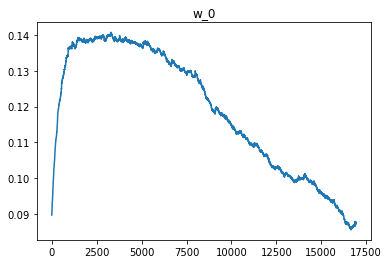

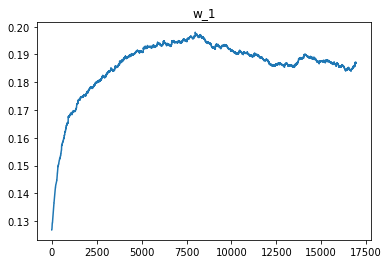

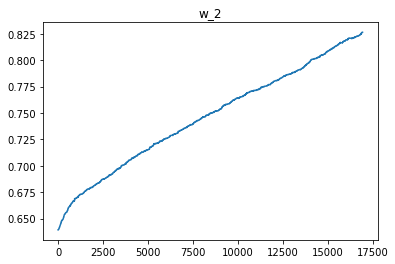

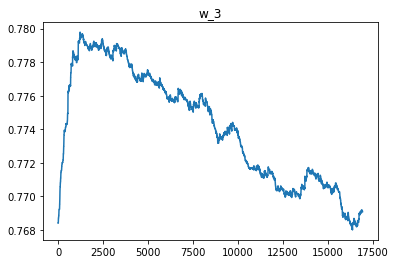

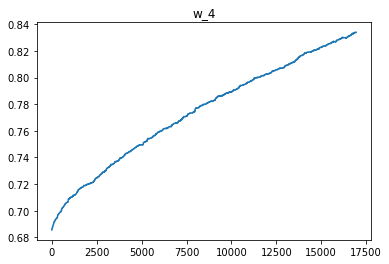

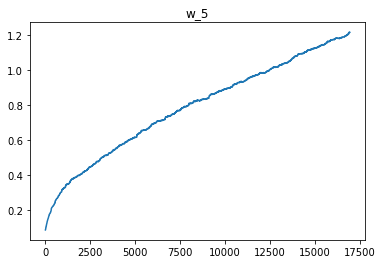

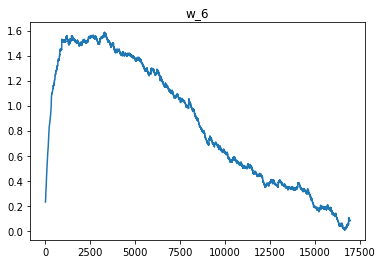

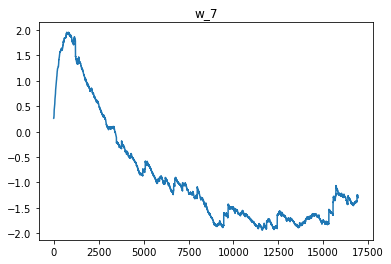

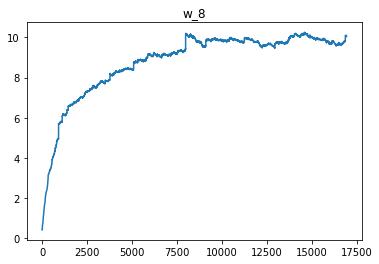

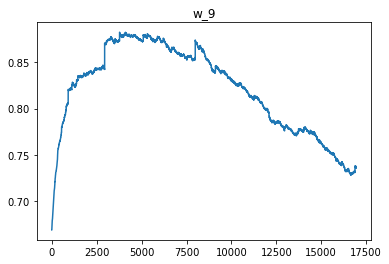

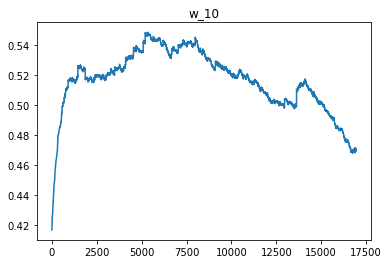

In [90]:
ind = 0
for wi in w0.transpose():
    title = 'w_{}'.format(ind)
    ind+=1
    plt.plot(wi)
    plt.title(title)
    plt.show()

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
%%time
model = LinearRegression()
model.fit(X,y)
print('w_0=', model.intercept_, ' and w_1,w_2,w_3=,w_4=,w_5=,w_6=,w_7=,w_8=,w_9=,w_10=',model.coef_[1:])
print('R2 score=', model.score(X,y))

w_0= -416.18877841970505  and w_1,w_2,w_3=,w_4=,w_5=,w_6=,w_7=,w_8=,w_9=,w_10= [  9.67322938 151.54202184  -4.89417589 153.77441483  62.24046053
   0.37228226  -0.28985928  11.12583177 -21.20507371  -0.18679939]
R2 score= 0.6838057003512197
CPU times: total: 0 ns
Wall time: 5 ms


In [96]:
weights = [model.intercept_, model.coef_[1],model.coef_[2], model.coef_[3],model.coef_[4],model.coef_[5],model.coef_[6],model.coef_[7],model.coef_[8],model.coef_[9],model.coef_[10]]
R2_SK = R2_score(X,y,weights)
R2_SK
# Applied SKlearn for the whole data set to find the best w and get R2 score as 0.68, which is higher than any model above.

0.6838057003512197

## Regularization

In [97]:
def grad_reg_squared_error(xi,yi,w,reg):
    err = pt_error(xi,yi,w)
    ww = w.copy()
    ww[0] = 0 
    return 2*xi*err + 2*reg*ww

In [98]:
def reg_least_squares_fit(X, y, reg, lr=1e-5, n_epochs=100):
    
    weights = np.random.random(X.shape[1])
    
    for _ in trange(n_epochs, desc="least squares fit"):
        for xi,yi in zip(X,y):
            gradient = grad_reg_squared_error(xi, yi, weights, reg)
            weights -= lr*gradient 

    return weights

In [99]:
w4 = reg_least_squares_fit(X,y,reg=0.,n_epochs=100)
w4

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

array([-368.61197409,   -0.88784666,  149.55952703,  -11.1271394 ,
        155.44142318,   60.12399292,   -6.20292651,    0.39751654,
         11.88894864,  -25.73615228,   -1.61213032])

In [100]:
R2_score(X,y,w4)

0.6076856677640641

In [101]:
scores = []
reg_range = [0,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,.1,1]
for reg in reg_range:
    w = reg_least_squares_fit(X,y,reg=reg, lr=1e-6, n_epochs = 100)
    scores.append(R2_score(X,y,w))

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/100 [00:00<?, ?it/s]

In [102]:
scores

[0.633729541724075,
 0.6337783481310337,
 0.633832079112536,
 0.6336700965253248,
 0.6336699057694413,
 0.6338132306771123,
 0.6337331531623454,
 0.6337477144141,
 0.6335092555308062,
 0.6315907618215506,
 0.6157380440922987]

## Regularization with minibatches

In [103]:
def ridge_fit(X, y,reg,lr=1e-5, n_epochs=1000, batch_size=1, initial_weights=None, shuffle=False):
    
    if initial_weights:
        weights = initial_weights
    else:
        weights = np.random.random(X.shape[1])

    batch_starts = [start for start in range(0, len(X), batch_size)]
    
    for _ in trange(n_epochs, desc="least squares fit"):
        if shuffle: 
            np.random.shuffle(batch_starts)
        for start in batch_starts:
            batch_X = X[start:start+batch_size]
            batch_y = y[start:start+batch_size]

            gradient = np.array([grad_reg_squared_error(xi, yi, weights, reg)
                                    for xi, yi in zip(batch_X, batch_y)]).mean(axis=0)
            weights -= lr*gradient

    return weights

In [104]:
w5 = ridge_fit(Z_train,y_train,reg=1e-6,lr=1e-8,n_epochs=300, batch_size= 5, shuffle=True)

least squares fit:   0%|          | 0/300 [00:00<?, ?it/s]

In [105]:
R2_score(Z_train,y_train,w5),R2_score(Z_test,y_test,w5)

(0.5795158303747474, 0.5611480659743073)

In [106]:
w6 = ridge_fit(Z_train,y_train,reg=1e-6,lr=1e-8,n_epochs=500, batch_size= 6, shuffle=True)

least squares fit:   0%|          | 0/500 [00:00<?, ?it/s]

In [108]:
R2_score(Z_train,y_train,w6),R2_score(Z_test,y_test,w6)

(0.5809227717510681, 0.5633118882817012)

In [117]:
model_1 = R2_score(X,y,w1)
model_2 = R2_score(Z,y,w2)
model_3 = R2_score(Z,y,w3)
model_4 = R2_score(X,y,w4)
model_5 = R2_score(Z,y,w5)
model_6 = R2_score(Z,y,w6)

In [118]:
model_1,model_2,model_3,model_4,model_5,model_6

(0.6835487516866097,
 0.6481388485482193,
 0.6112312362145762,
 0.6076856677640641,
 0.5742733955657932,
 0.5758964237737048)

In [119]:
scores

[0.633729541724075,
 0.6337783481310337,
 0.633832079112536,
 0.6336700965253248,
 0.6336699057694413,
 0.6338132306771123,
 0.6337331531623454,
 0.6337477144141,
 0.6335092555308062,
 0.6315907618215506,
 0.6157380440922987]

In [120]:
R2_SK

0.6838057003512197

### Conclusion

The simply linear model has the highest R2 score on the test data with a 68.51% precision and is the closest to the benchmark.
The others methods gave us less significant score of 65.36% for the generalized linear models, 45.68% for regularized model andSo for the data set here, the simple linear regression fits best.